* 1.1 Kết nối đến Database Sqlite có tên Thi.db:


In [1]:
import sqlite3
conn = sqlite3.connect('Thi.db')

In [2]:
c = conn.cursor()

* 1.2 Thực hiện câu lệnh tạo cấu trúc bảng:

In [3]:
#Create table
c.execute("""create table PHONG_BAN(
                Mapb varchar(2) PRIMARY KEY,
                Tenphong varchar(50))""")

In [4]:
 c.execute(""" create table NHAN_VIEN(
                Manv varchar(3) PRIMARY KEY,
                Tennv varchar(50),
                Mapb varchar(20))""")

In [5]:
 c.execute("""create table DE_NGHI(
                Sotu varchar(7) PRIMARY KEY,
                Ngay_tu DateTime,
                Manv varchar(3),
                Sotien_tu int)""")

In [6]:
 c.execute("""create table PHIEU_CHI(
                Sopc varchar(5),
                Ngay_chi DateTime,
                Sotu varchar(7),
                Manv varchar(3),
                Sotien_chi int);""")

* 1.3 Thực hiện câu lệnh SQL để thêm dữ liệu vào các bảng 

In [7]:
c.execute("insert into PHONG_BAN values ('KT', 'Phòng kế toán'), ('NS', 'Phòng nhân sự'), ('TV', 'Phòng Tư vấn - chăm sóc khách hàng'), ('MH', 'Phòng mua hàng'),  ('KD', 'Phòng kinh doanh')")

In [8]:
c.execute("insert into NHAN_VIEN values ('A01', 'Hoàng Ngọc Anh', 'MH'),('B01', 'Trần Văn Bình', 'NS'),('C01', 'Lê Thị Châu', 'KD'),('C02', 'Nguyễn Văn Chính', 'KD'),('D01', 'Lê Văn Dũng', 'KT'),('E01', 'Nguyễn Thị Thu Thủy', 'TV')")

In [9]:
c.execute("insert into DE_NGHI values ('2005001', '2005-04-15', 'A01', 10000000 ),('2005002', '2005-04-20', 'B01', 2000000 ),('2005003', '2005-04-28', 'C01', 3500000 ),('2005004', '2005-05-10', 'C02', 5000000 ),('2005005', '2005-07-12', 'A01', 4000000),('2005006', '2005-08-14', 'C01', 3000000 )")

In [10]:
c.execute("insert into PHIEU_CHI values('PC001', '2005-04-15','2005001', 'A01', 10000000),('PC002', '2005-04-21','2005002','B01',2000000 ),('PC003','2005-04-28','2005003','C01',3500000),('PC004', '2005-05-11','2005004','C02', 2000000),('PC005', '2005-05-13','2005004','C02',1000000),('PC006','2005-07-15', '2005005', 'A01', 2000000)")

In [11]:
conn.commit()

* 2.1 Liệt kê danh sách các nhân viên có tên lót là Văn

In [12]:
c.execute("""select * from NHAN_VIEN where Tennv like'%Văn%' """)
for row in c:
    print(row)

('B01', 'Trần Văn Bình', 'NS')
('C02', 'Nguyễn Văn Chính', 'KD')
('D01', 'Lê Văn Dũng', 'KT')


* 2.2 Liệt kê các nhân viên với tổng số tiền tạm ứng của mỗi nhân viên

In [13]:
c.execute("""select n.Manv, n.Tennv , sum(d.Sotien_tu) from NHAN_VIEN n inner join DE_NGHI d on n.Manv=d.Manv group by n.Manv""")
for row in c:
    print(row)

('A01', 'Hoàng Ngọc Anh', 14000000)
('B01', 'Trần Văn Bình', 2000000)
('C01', 'Lê Thị Châu', 6500000)
('C02', 'Nguyễn Văn Chính', 5000000)


* 2. 3 Liệt kê các phiếu đề nghị tạm ứng mà chưa có phiếu chi

In [14]:
c.execute("""select d.Sotu, d.Ngay_tu, d.Manv, d.Sotien_tu from DE_NGHI d where d.Sotu not in (select Sotu from PHIEU_CHI) """)
for row in c:
    print(row)

('2005006', '2005-08-14', 'C01', 3000000)


* 2.4 Liệt kê các phiếu đề nghị tạm ứng có Số tiền tạm ứng lớn hơn Số tiền tạm ứng trung bình

In [15]:
c.execute("""select * from DE_NGHI where Sotien_tu > (select avg(Sotien_tu) from DE_NGHI)""")
for row in c:
    print(row)

('2005001', '2005-04-15', 'A01', 10000000)
('2005004', '2005-05-10', 'C02', 5000000)


* 2.5 Liệt kê các phiếu tạm ứng chưa được chi đủ số tiền đề nghị tạm ứng

In [16]:
c.execute("""select d.* from DE_NGHI d left join (select sum(Sotien_chi) as tienCHi, Sotu from PHIEU_CHI group by Sotu) pc on d.Sotu=pc.Sotu  where tienChi < Sotien_tu""")
for row in c:
    print(row)

('2005004', '2005-05-10', 'C02', 5000000)
('2005005', '2005-07-12', 'A01', 4000000)


* 2.6 Liệt kê danh sách các nhân viên có nhiều đề nghị tạm ứng nhất

In [17]:
c.execute("""
            select d.Manv, n.Tennv, d.Ngay_tu, d.Sotien_tu from DE_NGHI d inner join NHAN_VIEN n on d.Manv=n.Manv
            group by d.Manv
            having count(Sotu)  = (select max(countTu) from (select distinct count(Sotu) as countTu, Manv
            from DE_NGHI
            group by Manv)) 
            
              
             """
         )
for row in c:
    print(row)

('A01', 'Hoàng Ngọc Anh', '2005-04-15', 10000000)
('C01', 'Lê Thị Châu', '2005-04-28', 3500000)


* 3.1 Tổng số tiền tạm ứng của phong

In [18]:
import pandas as pd


In [19]:
df = pd.read_sql('select pb.Mapb, pb.Tenphong, sum(d.Sotien_tu) as "Tổng tiền tạm ứng" from DE_NGHI d inner join NHAN_VIEN n on d.Manv=n.Manv inner join PHONG_BAN pb on pb.Mapb=n.Mapb group by pb.Mapb ', conn)
df

,Mapb,Tenphong,Tổng tiền tạm ứng
0,KD,Phòng kinh doanh,11500000
1,MH,Phòng mua hàng,14000000
2,NS,Phòng nhân sự,2000000


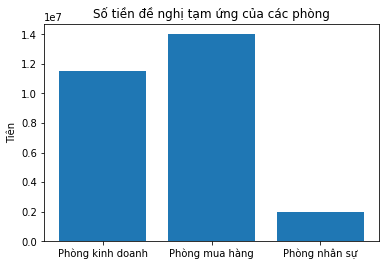

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.set_ylabel('Tiên')
ax.set_title('Số tiền đề nghị tạm ứng của các phòng')
plt.bar(df['Tenphong'], df['Tổng tiền tạm ứng'])
plt.show()

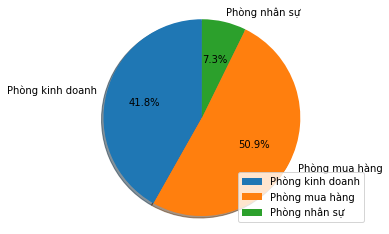

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(df['Tổng tiền tạm ứng'],  labels=df['Tenphong'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend( df['Tenphong'], loc="best")
plt.show()